<h1><Center>Part 1: Audio Feature Extraction and Data Exploration<center></h1>
<br>
<br>
<br>

<h3>Project Introduction</h3><br><br>


<p>
In this project, I will develop a lightweight supervised classification pipeline that distinguishes AI-generated speech from human-recorded speech using acoustic and spectral features.<br><br>
However, this project faces a major constraint regarding sample size; with only 79 samples as of August 2025, I will work around these limitations through hyperparameter tuning and by incorporating Monte Carlo validations on different train-test splits.
</p>

<p>
The analysis is divided into two notebooks: one for feature extraction and exploratory data analysis (EDA), and another for model development. This notebook covers feature extraction and EDA.
</p>

<small>I will begin by iteratively using the function from feature_Extraction.py for each wav file.</small>

In [25]:
#notebook setup
import pandas as pd
# show all columns
pd.set_option('display.max_columns', None)
# show all rows
pd.set_option('display.max_rows', None)
# optionally, prevent column width truncation
pd.set_option('display.max_colwidth', None)


In [26]:

from src.extract_features import extract_features
import os
data_dirr = "audio_files"

data = []

for root, dirs, files in os.walk(data_dirr): 
    for filename in files:
        if filename.endswith(".wav"):
            file_path = os.path.join(root, filename)

            #labelling data based on folder name in path
            if filename.endswith("AI.wav"):
                label = 1
            elif filename.endswith("human.wav"):
                label = 0
            else:
                continue #skip files in other random folders
            
            features = extract_features(file_path)
            features['file_id'] = filename
            features['label']   = label
            data.append(features)

df = pd.DataFrame(data) #convert the "Data" array to a dataframe
df.to_csv(os.path.join('data', 'audio_data.csv'), index=False) #save as csv to save time later on, if no new data is added, create a new cell and simply run: df = pd.read_csv("data\audio_data.csv")
df.head(3)

,pitch_mean,pitch_std,jitter,shimmer,f1_mean,f1_std,f1_min,f1_max,f1_range,f2_mean,f2_std,f2_min,f2_max,f2_range,f3_mean,f3_std,f3_min,f3_max,f3_range,f2_f1_ratio_mean,mfcc_1_mean,hnr_mean,hnr_std,delta_mean,centroid_mean,speaking_rate,file_id,label
0,120.594440,23.903477,0.020418,0.072717,729.234214,637.668681,57.570215,2670.935678,2613.365463,1916.259179,603.489801,457.137001,3962.851321,3505.714320,2888.272131,602.475903,1496.099867,4896.592954,3400.493088,4.996688,-274.024719,15.279263,7.296311,0.127195,1883.742920,30.983887,Aaron2_AI.wav,1
1,140.733415,38.456165,0.017851,0.071915,713.227317,620.859320,63.920487,2690.274227,2626.353740,1882.578046,611.465590,227.595475,3871.112541,3643.517065,2874.442302,576.689248,1506.485722,4691.016100,3184.530378,4.714194,-273.101166,15.034475,7.393424,0.368172,1774.251196,30.983887,Aaron_AI.wav,1
2,119.095355,70.450434,0.025469,0.108020,778.907273,465.287933,54.383812,2351.881158,2297.497345,1838.299358,560.966319,322.647005,3946.859266,3624.212261,2908.943218,584.913778,1023.631368,5192.603259,4168.971890,3.478130,-226.814087,8.458329,6.319398,-0.196979,2449.314858,31.129059,Adil_ray_AI.wav,1


In [1]:
import pandas as pd
df = pd.read_csv(r"data\audio_data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pitch_mean        79 non-null     float64
 1   pitch_std         79 non-null     float64
 2   jitter            79 non-null     float64
 3   shimmer           79 non-null     float64
 4   f1_mean           79 non-null     float64
 5   f1_std            79 non-null     float64
 6   f1_min            79 non-null     float64
 7   f1_max            79 non-null     float64
 8   f1_range          79 non-null     float64
 9   f2_mean           79 non-null     float64
 10  f2_std            79 non-null     float64
 11  f2_min            79 non-null     float64
 12  f2_max            79 non-null     float64
 13  f2_range          79 non-null     float64
 14  f3_mean           79 non-null     float64
 15  f3_std            79 non-null     float64
 16  f3_min            79 non-null     float64
 17 

<h2> Exploratory Data Analysis

Below, there are two describe() reports on the basic statistics of the dataset.<br>
<br>
The first first report is about AI generated voices (label = 1), and the second report is about Human voices (label = 0).

In [3]:
# label = 1 (AI)
df[df['label']== 1].describe()

,pitch_mean,pitch_std,jitter,shimmer,f1_mean,f1_std,f1_min,f1_max,f1_range,f2_mean,...,f3_max,f3_range,f2_f1_ratio_mean,mfcc_1_mean,hnr_mean,hnr_std,delta_mean,centroid_mean,speaking_rate,label
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,162.952608,54.579230,0.023501,0.091756,750.802638,477.792076,88.617983,2388.812198,2300.194215,1871.490555,...,4672.029915,3136.053400,3.587669,-253.708591,11.539376,7.166191,0.415066,2336.855358,30.982021,1.0
std,43.827590,23.157324,0.009554,0.022679,77.188952,99.384190,43.123480,315.632411,331.389457,95.821578,...,321.291894,457.234023,0.521416,45.646912,2.507542,1.023336,0.510189,359.321799,0.106971,0.0
min,104.717699,17.447589,0.010473,0.051481,553.264947,257.575345,50.938127,1620.886543,1518.534963,1670.838313,...,4070.896140,2276.901379,2.691215,-365.480600,5.664154,5.190592,-0.631731,1592.108388,30.625000,1.0
25%,124.000157,40.160090,0.017650,0.077255,711.602100,393.467379,57.830580,2191.479935,2077.976473,1817.339558,...,4460.130698,2821.981255,3.223601,-291.714605,9.749949,6.383344,0.025905,2070.560559,30.935554,1.0
50%,155.985972,53.147007,0.022449,0.083888,756.852225,487.447522,74.091720,2360.224067,2306.020363,1884.610816,...,4651.241504,3149.271732,3.539953,-259.265900,11.714769,7.052481,0.352717,2382.256584,31.005643,1.0
75%,199.206096,71.368687,0.027517,0.106433,799.361177,562.343047,103.173740,2667.794734,2582.570357,1929.574328,...,4857.183706,3456.873423,3.975289,-226.728743,13.103449,7.830147,0.760256,2566.192488,31.051664,1.0
max,256.151521,112.085202,0.068056,0.155632,908.679776,646.879176,250.750592,2922.865317,2826.549294,2034.424354,...,5448.632762,4168.971890,4.996688,-155.353160,16.214104,9.953026,1.592348,3067.971610,31.129059,1.0


In [4]:
# label = 0 (HUMAN)
df[df['label']== 0].describe()

,pitch_mean,pitch_std,jitter,shimmer,f1_mean,f1_std,f1_min,f1_max,f1_range,f2_mean,...,f3_max,f3_range,f2_f1_ratio_mean,mfcc_1_mean,hnr_mean,hnr_std,delta_mean,centroid_mean,speaking_rate,label
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,166.361923,57.336072,0.025814,0.100367,801.947482,464.413861,115.463013,2246.440410,2130.977397,1897.489857,...,4810.801931,3124.877204,3.119129,-274.960257,10.250815,7.256762,-0.106027,2285.507726,30.879195,0.0
std,40.591750,24.119745,0.008357,0.023087,80.967542,77.160298,59.829319,313.607086,337.002423,98.151324,...,456.422327,645.077107,0.422331,47.218663,2.883002,1.519045,0.574875,465.085725,0.188312,0.0
min,108.076674,14.747334,0.014952,0.058972,636.391684,330.535543,50.717142,1593.863016,1360.001499,1691.814686,...,4129.447425,1880.803167,2.130282,-393.291380,5.656219,3.944473,-1.875888,1311.853494,30.457831,0.0
25%,128.492247,38.635749,0.020689,0.083223,747.941749,399.561871,65.086554,2033.409443,1932.120359,1839.322099,...,4466.423754,2610.112356,2.854889,-306.186985,7.932006,6.373404,-0.313129,1952.730536,30.743366,0.0
50%,166.036989,58.557894,0.024091,0.099286,787.076867,456.023017,97.420701,2263.844954,2131.489192,1905.347443,...,4679.650614,3160.054316,3.069043,-273.795470,10.233864,7.087135,-0.114085,2293.468709,30.928124,0.0
75%,200.517355,71.724542,0.027631,0.115046,843.845256,531.018931,154.010257,2501.506184,2410.435988,1960.129730,...,5437.146694,3591.045517,3.348907,-246.641680,12.543436,8.091991,0.174494,2490.542755,31.021888,0.0
max,249.842787,108.332455,0.052046,0.147272,1027.676770,591.957649,262.495791,2955.894066,2853.472288,2114.295239,...,5445.237706,4160.393986,4.278509,-167.390520,16.893860,10.440854,0.880742,3382.053436,31.190420,0.0


In [5]:
#setting predictive variable "X" and target variable "y" for the following statistical tests
X = df.drop(['file_id', 'label'], axis=1, inplace=False)
y = df['label']

<br>
Next, I will conduct a t-test to quantify the differences between the two classes

In [7]:
from scipy.stats import ttest_ind
features = X.columns
target = 'label'
#comparing group 0 (human) to group 1 (AI)
results = {}
for feature in features:
    group_0 = df[df[target] == 0][feature] 
    group_1 = df[df[target] == 1][feature]
    
    t_stat, p_val = ttest_ind(group_0, group_1, nan_policy='omit')
    results[feature] = {'t-stat': t_stat, 'p-value': p_val}
#converting to dataframe for easier viewing
test_result_df = pd.DataFrame(results).T.sort_values('p-value')
test_result_df[test_result_df['p-value'] < 0.05]

,t-stat,p-value
f2_f1_ratio_mean,-4.308036,0.000048
delta_mean,-4.262880,0.000057
f3_mean,3.276408,0.001578
speaking_rate,-3.057467,0.003069
f2_range,-2.889382,0.005011
f1_mean,2.862749,0.005407
f2_max,-2.596702,0.011270
f3_min,2.515749,0.013960
f1_min,2.315990,0.023221
f1_range,-2.237693,0.028132


<br>
Next I will visualize and test the correlations between the predictive and target variables

<Axes: >

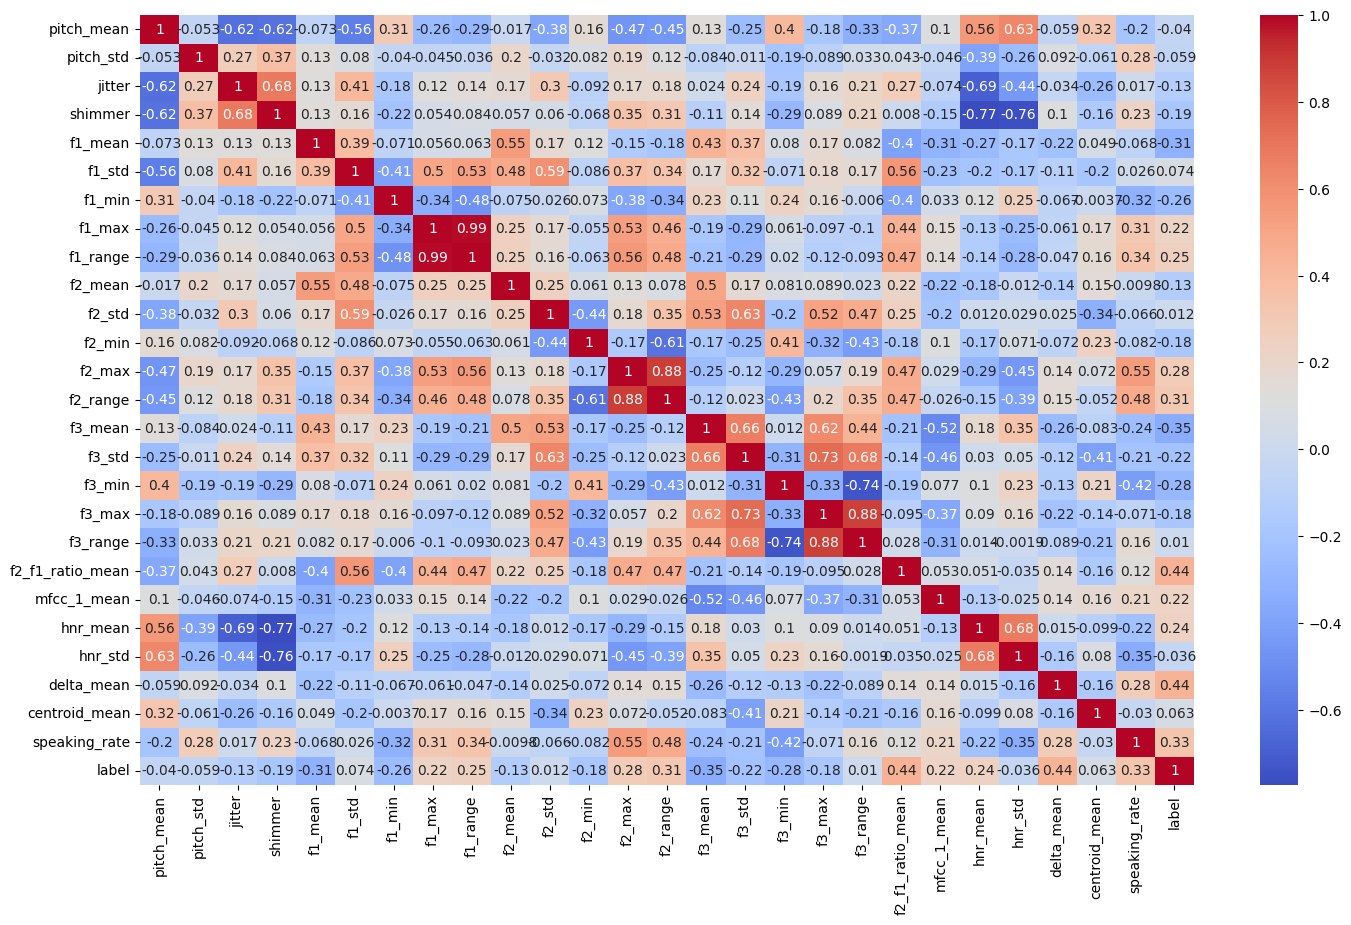

In [8]:
import seaborn as sns
cdf = df.drop(['file_id'], axis=1, inplace=False) #drop ID column

cormat = cdf.corr()
plt.figure(figsize=(17,10))
sns.heatmap(cormat, cmap='coolwarm', annot=True)

<center><h3>Observations and Thoughts</h3></center>

---

### Significant Relationships Between Formants (f1, f2, f3) and the Target Label

- **f1_mean** shows a moderate negative correlation with the target label (**-0.31**). This suggests that AI voices tend to have a lower vowel height — in other words, *if they had a mouth,* it would appear less open compared to human voices, which generally have a higher vowel height.

- Similarly, **f3_mean** has a negative correlation (**-0.35**) with the target, indicating that AI voices may have more relaxed lip rounding or a lower tongue tip position compared to humans.

- **delta_mean** (which measures the average change in the first MFCC coefficient throughout the audio) has a positive correlation (**0.44**) with the target. This implies that in AI-generated voices, `mfcc_1` tends to fluctuate more rapidly or dramatically between frames than in human voices.

---

### Data Quality Considerations

A common concern is that the audio recording conditions were not standardized across the dataset. While most AI voice samples are clean and high-quality, the human voice recordings vary considerably in quality.

However, formant values (like f1, f2, f3) are generally robust to audio quality or loudness variations. Additionally, features such as **f1_f2_ratio**, **speaking_rate**, and **delta_mean**—which show the highest correlations with the target—are also independent of recording quality. This strengthens confidence that the observed relationships are genuine and not artifacts of audio quality differences.


<br><br>
Another issue, as shown in the correlational heatmap, there is a lot of multicollinearity within the dataset, which may become a problem when using these features in Machine Learning <br><br>

This issue will be addressed in [02_model_development.ipynb](02_model_development.ipynb), where I will move on to model development.